## Prompt Chaining Workflow 
### Topic Blog Generation

In [1]:
from langgraph.graph import StateGraph,START,END
from typing import List, Dict,TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI(model="gpt-4.1-nano-2025-04-14")

In [31]:
# define a state

class BlogState(TypedDict):
    topic: str
    outline: str
    blog_content: str
    evaluation: str


In [18]:
def create_outline(state: BlogState) -> BlogState:
    """
    Generate an outline for a blog based on the topic.
    """
    # fetch topic from state
    topic = state['topic']
    # create a prompt for the model
    prompt = f"Create a detailed outline for a blog post on the topic: {topic}."
    # invoke the model with the prompt
    response = model.invoke(prompt).content
    # store the response in the state
    state['outline'] = response
    return state

In [19]:
def create_blog(state: BlogState) -> BlogState:
    """
    Generate a blog post based on the outline.
    """
    # fetch outline from state
    outline = state['outline']
    # create a prompt for the model
    prompt = f"Write a detailed blog post based on the following outline:\n{outline}"
    # invoke the model with the prompt
    response = model.invoke(prompt).content
    # store the response in the state
    state['blog_content'] = response
    return state

In [35]:
def evaluate_blog(state: BlogState) -> BlogState:
    """
    Evaluate the blog post and return a score.
    """
    # fetch blog content from state
    outline = state['outline']
    blog_content = state['blog_content']
    # create a prompt for the model
    prompt = f"Evaluate the following blog post and it's outline and give it a score out of 10 based on number of appropriate paramteres which are industry standard:\n{outline}"
    # invoke the model with the prompt
    response = model.invoke(prompt).content
    # store the response in the state
    state['evaluation'] = response
    return state

In [36]:
graph = StateGraph(BlogState)

# nodes
graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)
graph.add_node("evaluate_blog",evaluate_blog)

# edges
graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","create_blog")
graph.add_edge("create_blog","evaluate_blog")
graph.add_edge("evaluate_blog",END)

# compile the graph
workflow = graph.compile()

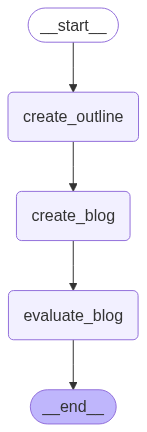

In [37]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [38]:
initial_state = {"topic": "The Future of AI in Everyday Life"}

final_state = workflow.invoke(initial_state)

In [39]:
print(final_state['outline'])  # This will contain the generated blog content

**Outline for Blog Post: The Future of AI in Everyday Life**

I. Introduction
   A. Brief overview of AI advancements to date
   B. Importance of AI integration in daily routines
   C. Purpose and scope of the article

II. Current State of AI in Daily Life
   A. AI-powered devices and applications
      1. Virtual assistants (e.g., Siri, Alexa, Google Assistant)
      2. Smart home devices and automation
      3. Personalized recommendations (shopping, streaming, social media)
   B. Benefits experienced today
      1. Convenience and efficiency
      2. Improved safety and security
      3. Enhanced accessibility for disabilities

III. Emerging Trends and Innovations
   A. AI in healthcare
      1. Diagnostics and personalized medicine
      2. Wearables and health monitoring
   B. AI in transportation
      1. Autonomous vehicles
      2. Traffic management and routing
   C. AI in education
      1. Personalized learning experiences
      2. Administrative automation
   D. AI in enter

In [40]:
print(final_state['blog_content'])  # This will contain the generated blog content

**The Future of AI in Everyday Life:Transforming Our World One Innovation at a Time**

---

### I. Introduction

Artificial Intelligence (AI) has rapidly evolved from a niche technological concept to an integral part of our daily routines. Over the past decade, breakthroughs in machine learning, natural language processing, and data analytics have fueled AI’s proliferation across various domains. From voice assistants to smart homes, AI continues to reshape how we communicate, work, and enjoy leisure.

Understanding the trajectory of AI integration is crucial as we stand on the cusp of a future where intelligent systems will be even more embedded in our surroundings. This blog explores the current AI landscape, emerging innovations, future prospects, societal impacts, and how we can prepare responsibly for an AI-augmented world.

---

### II. Current State of AI in Daily Life

#### A. AI-powered Devices and Applications

**1. Virtual Assistants:**  
Voice-activated assistants like Siri

In [42]:
print(final_state['evaluation'])

This outline demonstrates a comprehensive and well-structured approach to discussing the future of AI in everyday life. Here's a detailed evaluation based on industry-standard parameters:

1. **Clarity and Logical Flow (9/10):**  
   The outline is organized logically—from current state to emerging trends, future outlook, societal impacts, and preparation—mirroring best practices in content structure.

2. **Coverage of Relevant Topics (9/10):**  
   It touches on all major areas: current applications, technological trends, ethical considerations, societal impacts, and preparation strategies. The inclusion of emerging technologies like IoT, 5G, AR/VR aligns well with industry norms.

3. **Inclusion of Industry-Standard Sections (8/10):**  
   - *Introduction and Conclusion:* Present  
   - *Current State and Trends:* Present  
   - *Future Outlook:* Covered  
   - *Ethics and Challenges:* Included  
   - *Societal Impacts:* Addressed  
   - *Preparation and Education:* Covered  
   - *R